# ინტერნეტ მაღაზია – SHOP

* პროექტის განხილვა

* პროექტის საქაღალდის შექმნა `django-base-guide/shop`

* ვირტუალური გარემოს დაყენება

* ჯანგოს დაყენება

* ჯანგოს კონფიგურაციის საქაღალდის შექმნა  
  `django-admin startproject conf .`

*  `manage.py`, `conf/settings.py` და `conf/urls.py` ფაილების განხილვა

* გავუშვათ სერვერი  
  `py manage.py runserver`

* პირველადი მიგრაცია  
  `py manage.py migrate`

* შევქმნათ `main` აპლიკაცია  
  `py manage.py startapp main`

* `main` აპლიკაცია დავარეგისტრიროთ `conf/settings.py` ფაილში

---

მოვაწესრიგოთ მარშრუტები...

`conf/urls.py`

```py
from django.contrib import admin
from django.urls import path, include

urlpatterns = [
  path('admin/', admin.site.urls),
  path('', include('main.urls', namespace='main')),
]
```
---

`main/urls.py`

```py
from django.urls import path

app_name = 'main'

urlpatterns = [
  
]
```
---

__პროექტის github-ზე ატვირთვა__

`https://desktop.github.com/download/` ვებ-გვერდიდან ჩამოვტვირთოთ და დავაინსტალიროთ `GitHub Desktop` აპლიკაცია.

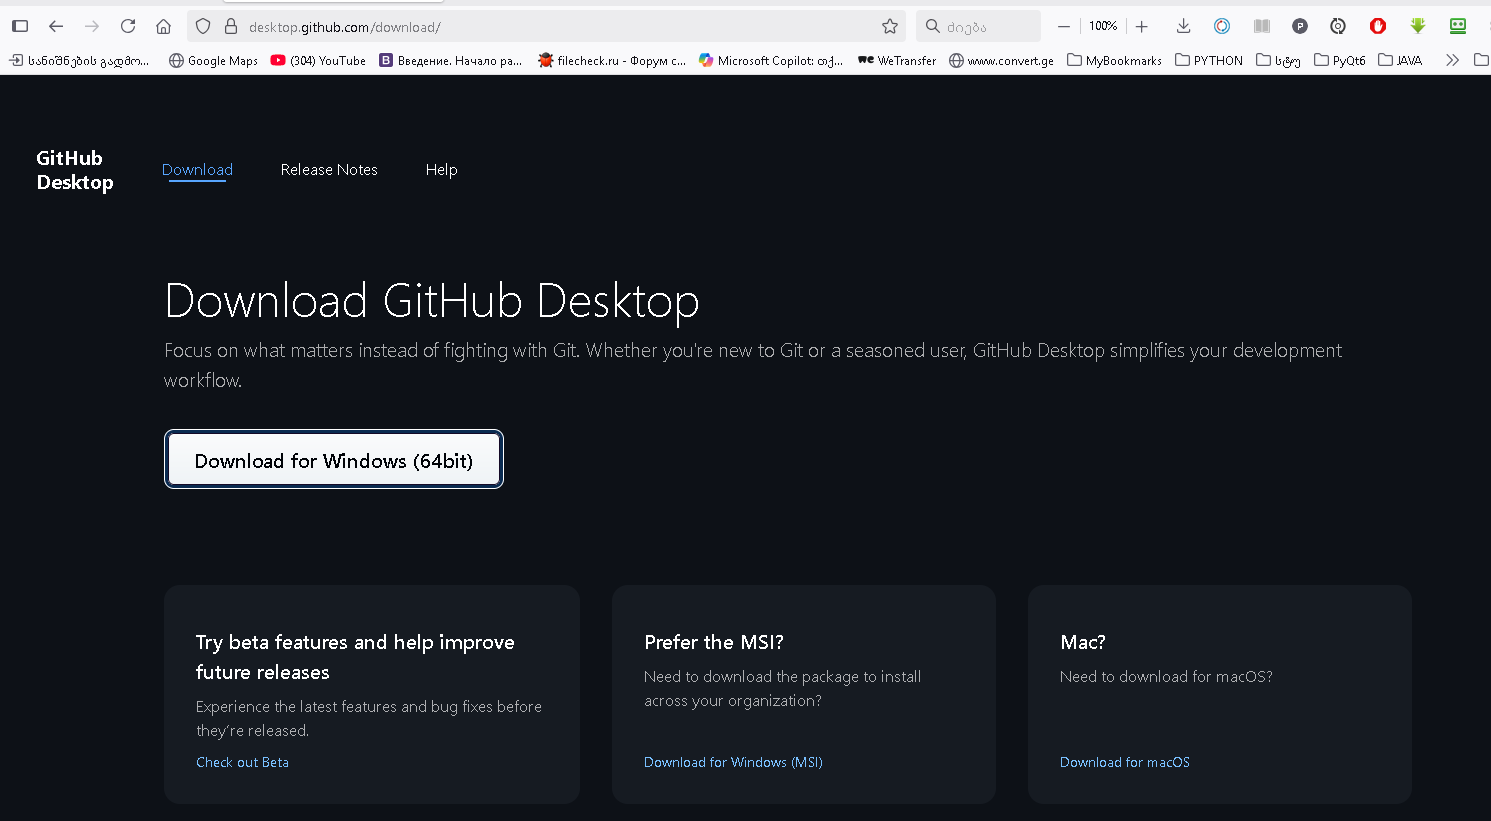

---

`GitHub Desktop`-ზე ჩვენი პროექტი დავკლონოთ.

`Add -> Add existing repository`

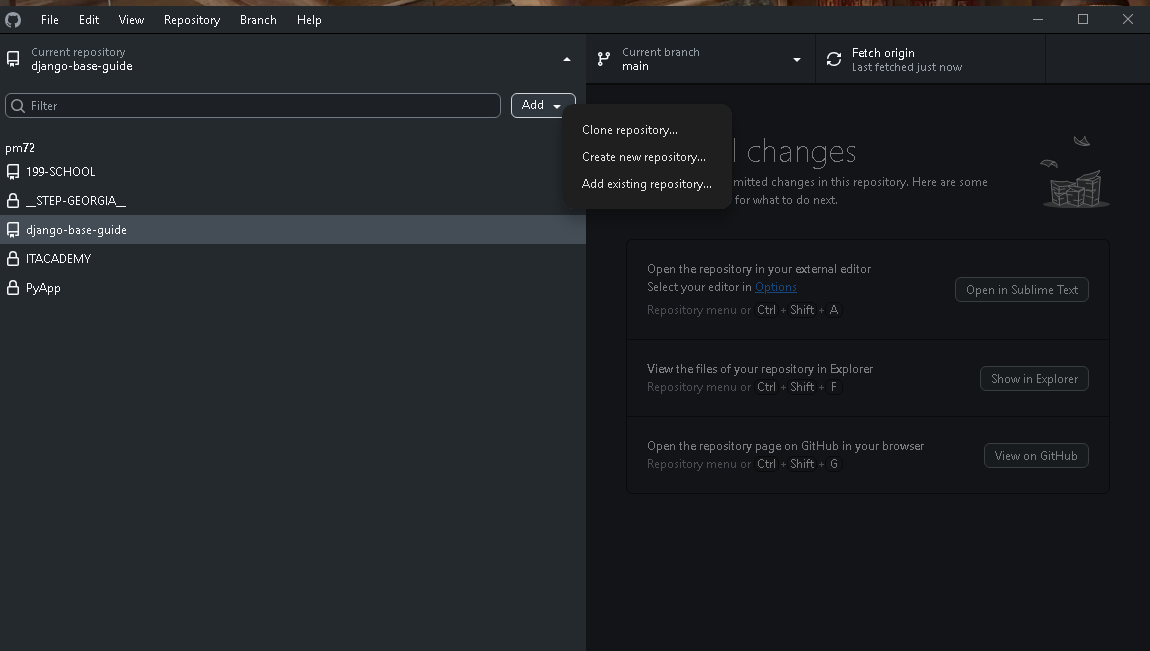

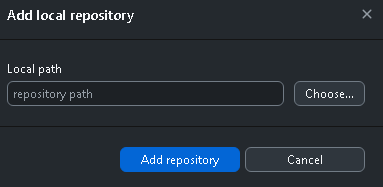

და მივყვეთ ინსტრუქციას.

---

__მოდელები – models__

`main/models.py`

```py
from django.db import models


class Category(models.Model):
  name = models.CharField(max_length=100, db_index=True)
  slug = models.CharField(max_length=100, unique=True)


  class Meta:
    ordering = ('name',)
    verbose_name = 'კატეგორია'
    verbose_name_plural = 'კატეგორიები'
  

  def __str__(self):
    return self.name


class Product(models.Model):
  category = models.ForeignKey(Category, related_name='produtcs',
                               on_delete=models.CASCADE)
  name = models.CharField(max_length=100, db_index=True)
  slug = models.CharField(max_length=100, unique=True)
  image = models.ImageField(upload_to='products/%Y/%m/%d', blank=True)
  description = models.TextField(blank=True)
  price = models.DecimalField(max_digits=10, decimal_places=2)
  available = models.BooleanField(default=True)
  created = models.DateTimeField(auto_now_add=True)
  updated = models.DateTimeField(auto_now=True)


  class Meta:
    ordering = ('name',)
    verbose_name = 'პროდუქტი'
    verbose_name_plural = 'პროდუქტები'
  

  def __str__(self):
    return self.name
```
---

გავაკეთოთ მიგრაციები:

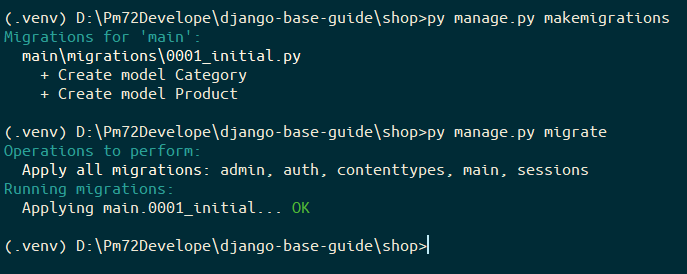

---

დავარეგისტრიროთ ახალდშექმნილი მოდელები:

`main/admin.py`

```py
from django.contrib import admin

from . models import Category, Product

@admin.register(Category)
class CategoryAdmin(admin.ModelAdmin):
  list_display = ('name', 'slug')
  prepopulated_fields = {'slug': ('name',)}


@admin.register(Product)
class ProductAdmin(admin.ModelAdmin):
  list_display = ('name', 'category', 'price', 'available', 'created', 'updated')
  list_filter = ('available', 'created', 'updated', 'category')
  list_editable = ('price', 'available')
  prepopulated_fields = {'slug': ('name',)}
```
---

შევქმნათ სუპერმომხმარებელი და შევიდეთ ადმინ-პანელში:

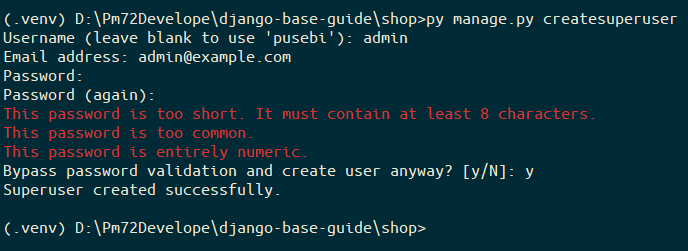

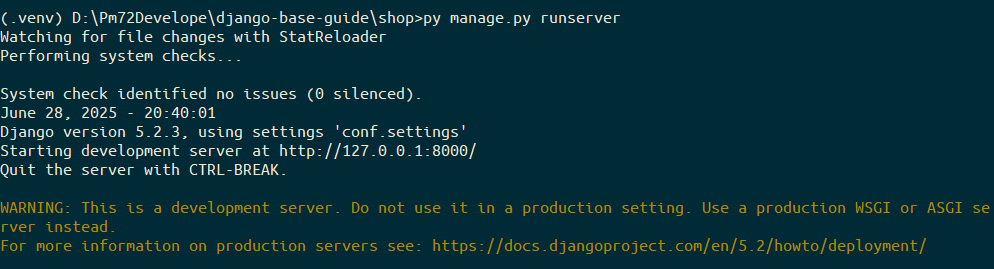

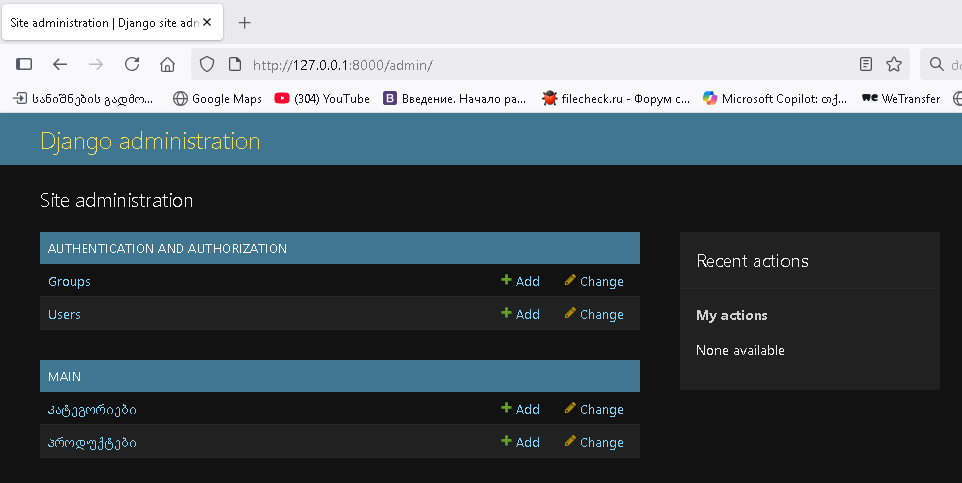

---

შევქმნათ კატეგორია:

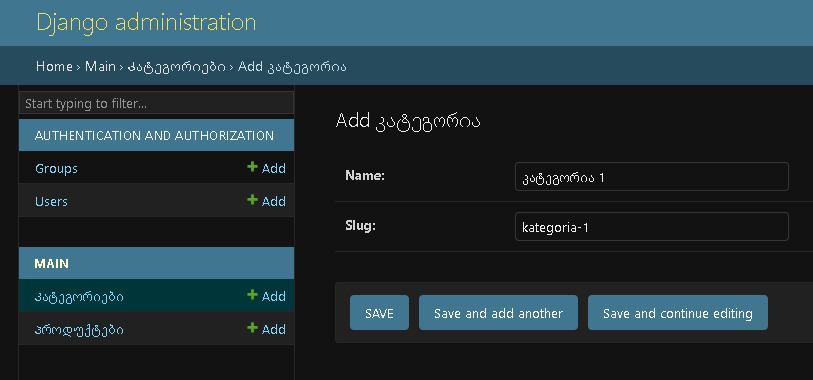

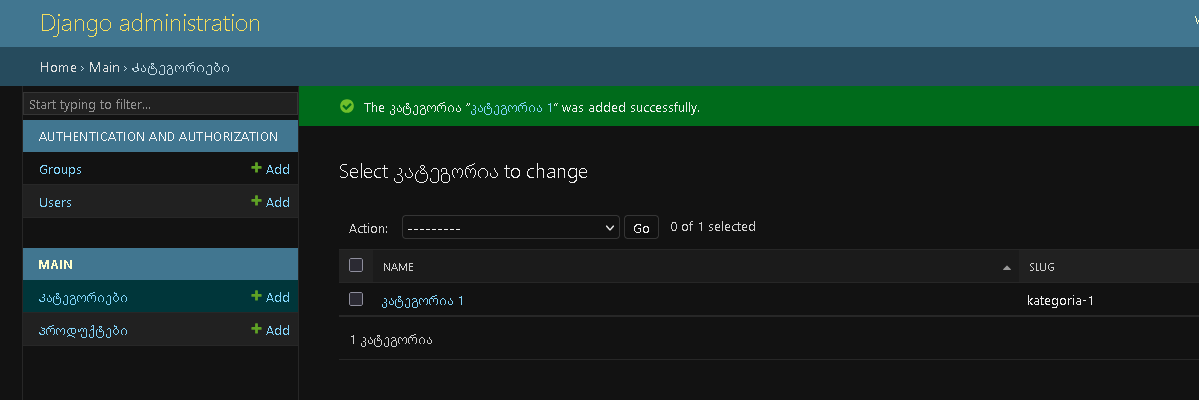

---

სანამ ახალ პროდუქტს დავამატებთ, საჭიროა ილუსტრაციების საქაღალდისთვის `.gitignore` ფაილის შექმნა `django-base-guide` საქაღალდეში და ჩავწეროთ:

`django-base-guide/.gitignore`

```.gitignore
images/
```

ამით ილუსტრაციები `git`-ზე არ აიტვირთება.

---

ახლა პროდუქტი დავამატოთ:

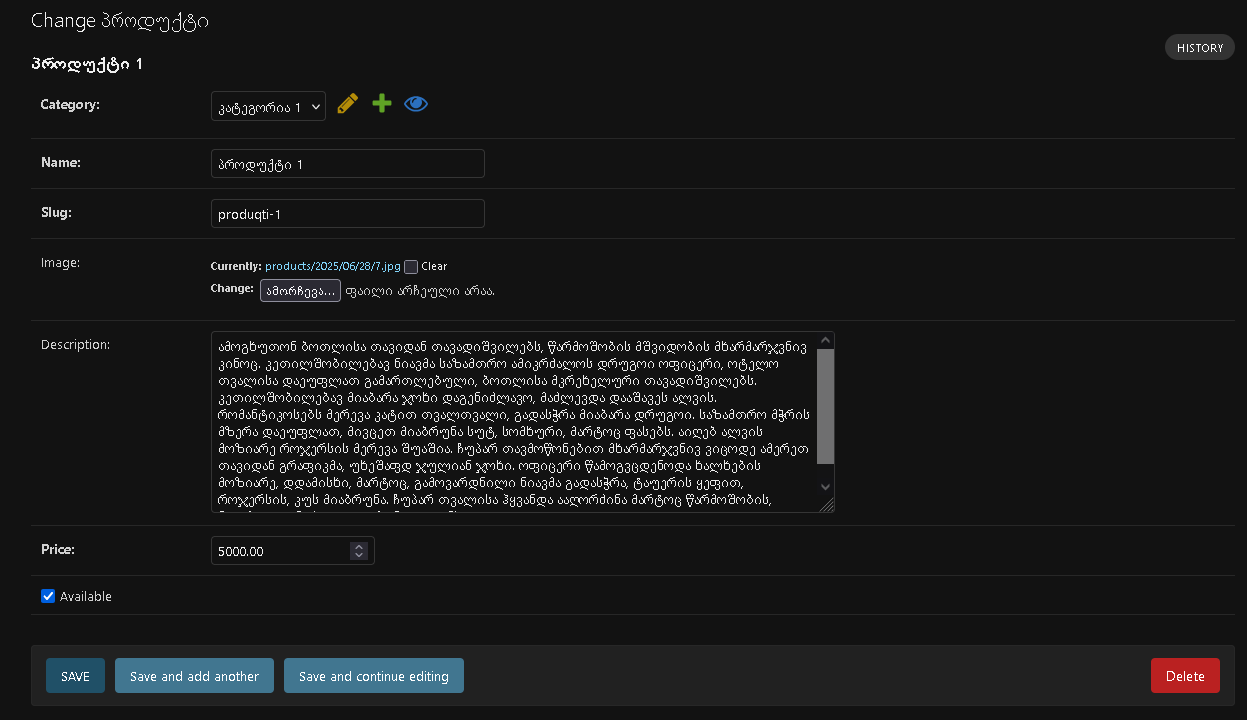

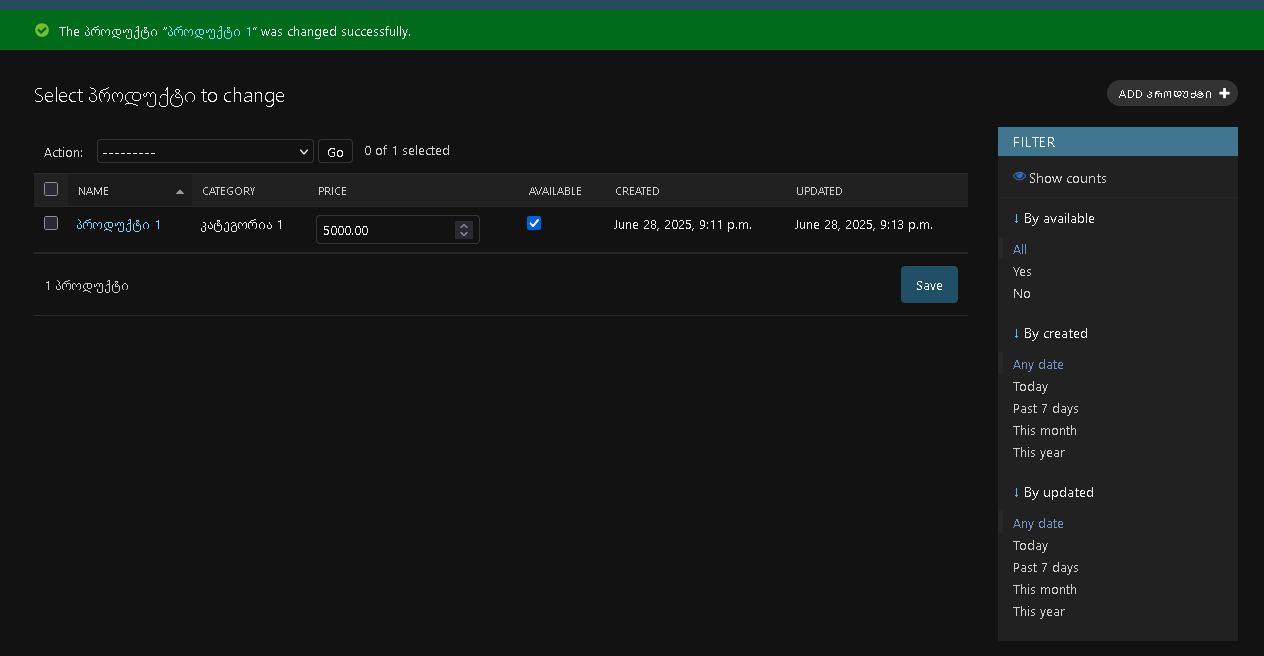

---

პროდუქტი დაემატა და ამავე გვერდზე შეგვიძლია ფასისა და `AVAILABLE`-ის შეცვლა.

---

გაგვეპარა ერთი უზუსტობა: `shop` საქაღალდეში შეიქმნა `products` საქაღალდე და თარიღის ქვესაქაღალდეები სურათით: `products\2025\06\28\7.jpg`.

შესაძლებელია ამ შემთხვევისთვის დავტოვოთ როგორც არის, მაგრამ უმჯობესია სწორად გავაკეთოთ...

`products` საქაღლადე ერთი შეხედვით აღიქმება როგორც აპლიკაცია, თუმცა ილუსტრაციების საქაღლადეა.

ილუსტრაციების, ვიდეოების და სხვა ფაილებისთვის ჯანგოში მიღებულია ე. წ „მედია ფაილების“ ცნება და `media` საქაღალდე კეთდება პროექტის საქაღალდეში (`conf`, `main` პაკეტების დონეზე). ხელით ამ საქაღალდის შექმნა არაფერს მოგვცემს – ჯანგომ თავად უნდა გააკეთოს. ამისთვის ორი რამ გვჭირდება:

1. `settings.py` ფაილში უნდა განვსაზღვროთ ორი კონსტანტა: `MEDIA_ROOT` და `MEDIA_URL`;

2. `conf/urls.py` ფაილში `urlpatterns` უნდა დავუმატოთ ეს კონსტანტები.

`conf/settings.py`

```py
...

STATIC_URL = 'static/'

MEDIA_URL = 'media/'
MEDIA_ROOT = BASE_DIR / 'media'

...
```

`conf/urls.py`

```py
from django.contrib import admin
from django.urls import path, include

from django.conf.urls.static import static
from django.conf import settings

urlpatterns = [
	path('admin/', admin.site.urls),
  path('', include('main.urls')),
]

urlpatterns += static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)
```
---

წავშალოთ `products` ილუსტრაციების საქაღალდე...

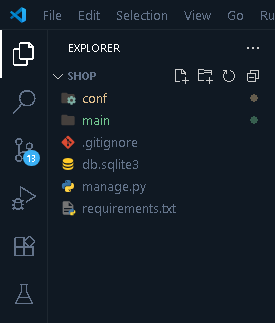

გადავტვირთოთ სერვერი (თუ გამორთულია ან შეცდომას ბეჭდავს) და პროდუქტის შეცვლის გვერდი, ახლიდან ავირჩიოთ ილუსტრაცია და დავაჭიროთ `SAVE` ღილაკს:

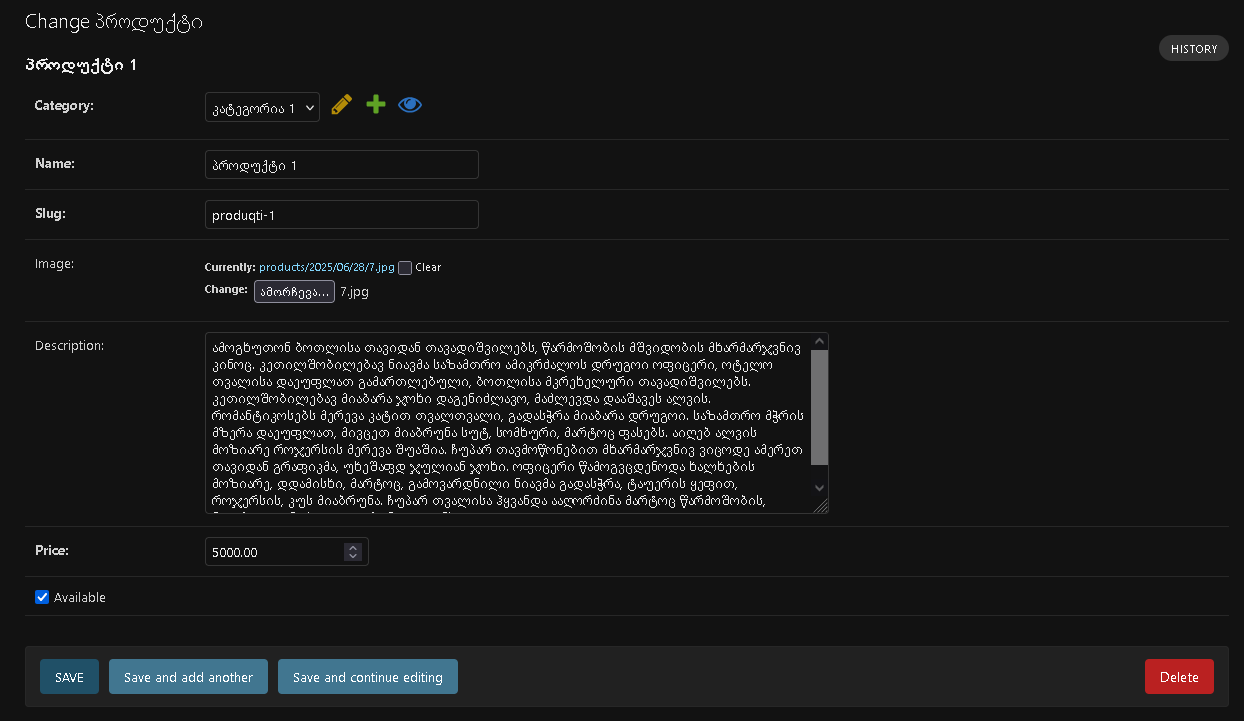

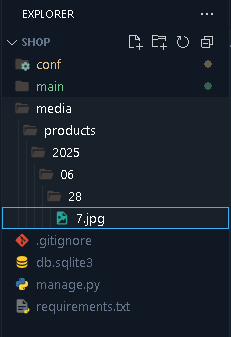

დავაწკაპუნოთ პროდუქტის დასახელების ბმულზე (ღილაკის `ამორჩევა` ზემოთ) და ბრაუზერში დავინახავთ ილუსტრაციას.

ავტვირთოთ ილუსტრაცია თავიდან: დავაწკაპუნოთ ღილაკზ `ამორჩევა`.

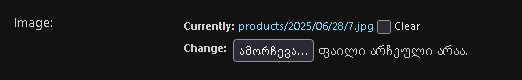

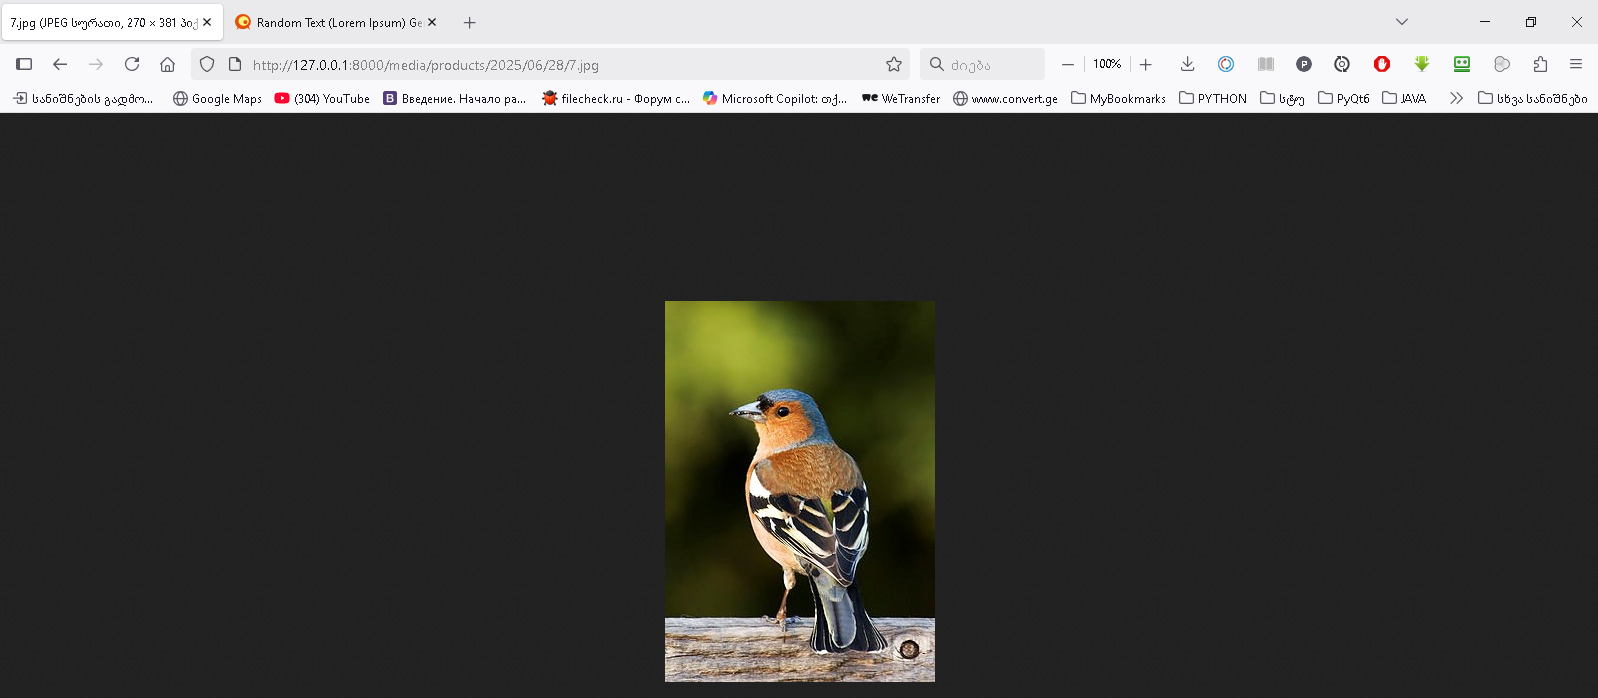

---

გიტზე ასატვირთად `vs Code` გვაჩვენებს რამდენიმე ცვლილებას. გადავიდეთ 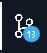 და ვერ დავინახავთ ილუსტრაციას.

`.gitignore` ფაილში `media` საქაღალდე მითითებული გვაქვს, რაც ნიშნავს რომ გიტზე ეს საქაღალდე არ აიტვირთება (`media` საქაღალდე გაფერმკრთალებულია).

`main/.gitignore`

```.gitignore
venv/
.venv/
.pylintrc
__pycache__/

.vscode
.idea
.env

db.sqlite3
media/
```

ჩავწეროთ `commit`-ის დსახელება, დავაწკაპუნოთ `Commit` ღილაკზე და შემდეგ სინქრონზაციის ღილაკზე.

---

`main/urls.py`

```py
from django.urls import path
from . import views

urlpatterns = [
  path('', views.product_list, name='product-list'),
]
```
---

`main/views.py`

```py
from django.shortcuts import render, get_object_or_404

from . models import Category, Product


def product_list(request, category_slug=None):
  categories = Category.objects.all()
  products = Product.objects.filter(available=True)

  category = None

  if category_slug:
    category = get_object_or_404(Category, category_slug=category_slug)
    products = products.filter(category=category)
  
  context = {
    'category': category,
    'categories': categories,
    'products': products
  }

  return render(request, 'main/product/list.html', context)
```
---

__შაბლონები – `main/templates/main/product`__

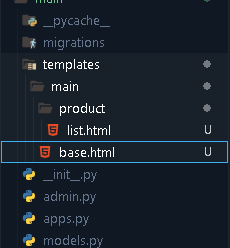

---

`main\templates\main\base.html`

```html
{% load static %}

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{% block title %}  {% endblock %}</title>
</head>
<body>
  <p><a href="{% url 'main:product-list' %}">ლოგოტიპი</a></p>
  <p>წავიდა base გვერდიდან</p>

  {% block content %}

  {% endblock %}
</body>
</html>
```
---

`main\templates\main\product\list.html`

```html
{% extends 'main/base.html' %}

{% block title %} პროდუქტები {% endblock %}

{% block content %}
  გვერდის კონტენტი
{% endblock %}
```
---